In [102]:
import os
print(os.getcwd())

/Users/lakshaykapur/Developer/DMAT/MERA_Analysis/ADS


In [103]:
import numpy as np
import pandas as pd

In [104]:
file_path = '/Users/lakshaykapur/Developer/ADS/dly532.csv'
if os.path.exists(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
        #print(data)
else:
    print(f"File not found: {file_path}")

,,,,,,,,,,,,,,,,,,,,,,,,,
date,ind,maxtp,ind,mintp,igmin,gmin,ind,rain,cbl,wdsp,ind,hm,ind,ddhm,ind,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
01-jan-1942,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,17.2,1, ,1, ,1, ,0.0,0, , ,1.1,1.4, , , 
02-jan-1942,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,15.2,1, ,1, ,1, ,0.0,0, , ,0.7,0.9, , , 
03-jan-1942,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,14.0,1, ,1, ,1, ,0.1,0, , ,0.5,0.6, , , 
04-jan-1942,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,17.0,1, ,1, ,1, ,0.6,0, , ,0.6,0.7, , , 
05-jan-1942,0,3.5,1,-0.8,0,0.0,0,0.6,1013.4,13.0,1, ,1, ,1, ,3.4,0, , ,0.6,0.7, , , 
06-jan-1942,0,5.1,0,0.7,1,-3.7,2,0.0,1021.1,9.7,1, ,1, ,1, ,0.1,0, , ,0.4,0.5, , , 
07-jan-1942,0,7.1,0,0.5,1,-1.0,3,0.0,1021.7,10.3,1, ,1, ,1, ,4.0,0, , ,0.2,0.2, , , 
08-jan-1942,0,7.1,0,1.4,0,0.2,3,0.0,1016.8,9.3,1, ,1, ,1, ,3.7,0, , ,0.2,0.2, , , 
09-jan-1942,0,4.5,0,0.7,0,0.9,0,0.2,1012.0,11.8,1, ,1, ,1, ,0.6,0, , ,0.5,0.7, , , 
10-jan-1942,0,5.3,1,-2.8,1,-4.1,3,0.0,1015.9,4.0,1, ,1, ,1, ,5.0,0, , ,0.0,0.1, , , 
11-jan

In [105]:
df = pd.read_csv(file_path, delimiter=',')
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)
df.head()

,date,ind,maxtp,ind,mintp,igmin,gmin,ind,rain,cbl,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,01-jan-1942,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,...,,0.0,0,,,1.1,1.4,,,
1,02-jan-1942,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,...,,0.0,0,,,0.7,0.9,,,
2,03-jan-1942,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,...,,0.1,0,,,0.5,0.6,,,
3,04-jan-1942,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,...,,0.6,0,,,0.6,0.7,,,
4,05-jan-1942,0,3.5,1,-0.8,0,0.0,0,0.6,1013.4,...,,3.4,0,,,0.6,0.7,,,


In [106]:
print(df.shape) #rows & cols
print(df.dtypes) #datatype of each var

(30255, 26)
0
date      object
ind       object
maxtp     object
ind       object
mintp     object
igmin     object
gmin      object
ind       object
rain      object
cbl       object
wdsp      object
ind       object
hm        object
ind       object
ddhm      object
ind       object
hg        object
sun       object
dos       object
g_rad     object
soil      object
pe        object
evap      object
smd_wd    object
smd_md    object
smd_pd    object
dtype: object


In [107]:
df["date"] = pd.to_datetime(df["date"])  # Convert to datetime
df["ind"] = df["ind"].astype("category")  # Convert to category
numeric_columns = ["maxtp", "mintp", "rain", "wdsp", "sun", "soil", "smd_wd", "smd_md", "smd_pd", "hm", "hg", "ddhm"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")  # Convert to float

/var/folders/qt/k1yvp7ls32j_71y26w2m42qc0000gn/T/ipykernel_32405/3691221641.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])  # Convert to datetime


In [108]:
print(df.info())  # Verify the datatypes
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30255 entries, 0 to 30254
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    30255 non-null  datetime64[ns]
 1   ind     30255 non-null  category      
 2   maxtp   30255 non-null  float64       
 3   ind     30255 non-null  category      
 4   mintp   30255 non-null  float64       
 5   igmin   30255 non-null  object        
 6   gmin    30255 non-null  object        
 7   ind     30255 non-null  category      
 8   rain    30255 non-null  float64       
 9   cbl     30255 non-null  object        
 10  wdsp    30255 non-null  float64       
 11  ind     30255 non-null  category      
 12  hm      29368 non-null  float64       
 13  ind     30255 non-null  category      
 14  ddhm    29356 non-null  float64       
 15  ind     30255 non-null  category      
 16  hg      29368 non-null  float64       
 17  sun     30255 non-null  float64       
 18  dos   

In [109]:
print(df.isnull().sum())

0
date          0
ind           0
maxtp         0
ind           0
mintp         0
igmin         0
gmin          0
ind           0
rain          0
cbl           0
wdsp          0
ind           0
hm          887
ind           0
ddhm        899
ind           0
hg          887
sun           0
dos           0
g_rad         0
soil       4322
pe            0
evap          0
smd_wd    13814
smd_md    13814
smd_pd    13814
dtype: int64


In [110]:
df['hm'] = df['hm'].fillna(df['hm'].mean())
df['ddhm'] = df['ddhm'].fillna(df['ddhm'].mean())
df['hg'] = df['hg'].fillna(df['hg'].mean())
df['soil'] = df['soil'].fillna(df['soil'].mean())
df['smd_wd'] = df['smd_wd'].fillna(df['smd_wd'].mean())
df['smd_md'] = df['smd_md'].fillna(df['smd_md'].mean())
df['smd_pd'] = df['smd_pd'].fillna(df['smd_pd'].mean())

In [111]:
print(df.isnull().sum())

0
date      0
ind       0
maxtp     0
ind       0
mintp     0
igmin     0
gmin      0
ind       0
rain      0
cbl       0
wdsp      0
ind       0
hm        0
ind       0
ddhm      0
ind       0
hg        0
sun       0
dos       0
g_rad     0
soil      0
pe        0
evap      0
smd_wd    0
smd_md    0
smd_pd    0
dtype: int64


In [112]:
df.duplicated().sum() #check duplicates

0

In [113]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [114]:
print(df.head())

0       date ind  maxtp ind  mintp igmin gmin ind  rain     cbl  ...  g_rad  \
0 1942-01-01   0    9.7   0    6.8     0  4.7   2   0.0  1020.3  ...          
1 1942-01-02   0    9.9   0    7.9     0  6.7   0   0.1  1016.2  ...          
2 1942-01-03   0   11.2   0    8.9     0  7.2   0   1.5  1006.8  ...          
3 1942-01-04   0    9.2   0    2.7     0  3.4   0   3.5  1001.5  ...          
4 1942-01-05   0    3.5   1   -0.8     0  0.0   0   0.6  1013.4  ...          

0       soil   pe evap     smd_wd     smd_md     smd_pd  year month day  
0  10.485625  1.1  1.4  15.161669  14.425546  11.253373  1942     1   1  
1  10.485625  0.7  0.9  15.161669  14.425546  11.253373  1942     1   2  
2  10.485625  0.5  0.6  15.161669  14.425546  11.253373  1942     1   3  
3  10.485625  0.6  0.7  15.161669  14.425546  11.253373  1942     1   4  
4  10.485625  0.6  0.7  15.161669  14.425546  11.253373  1942     1   5  

[5 rows x 29 columns]


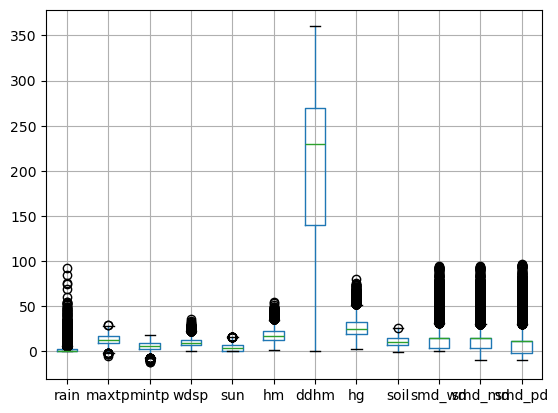

In [115]:
import matplotlib.pyplot as plt
df.boxplot(column=['rain', 'maxtp', 'mintp', 'wdsp', 'sun','hm', 'ddhm','hg', 'soil', 'smd_wd', 'smd_md', 'smd_pd'])
plt.show()

In [116]:
Q1 = df['rain'].quantile(0.25)
Q3 = df['rain'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['rain'] = df['rain'].clip(lower_bound, upper_bound)

In [117]:
df['maxtp'] = df['maxtp'].clip(lower_bound, upper_bound)
df['mintp'] = df['mintp'].clip(lower_bound, upper_bound)
df['wdsp'] = df['wdsp'].clip(lower_bound, upper_bound)
df['sun'] = df['sun'].clip(lower_bound, upper_bound)
df['hm'] = df['hm'].clip(lower_bound, upper_bound)
df['ddhm'] = df['ddhm'].clip(lower_bound, upper_bound)
df['hg'] = df['hg'].clip(lower_bound, upper_bound)
df['soil'] = df['soil'].clip(lower_bound, upper_bound)
df['smd_wd'] = df['smd_wd'].clip(lower_bound, upper_bound)
df['smd_md'] = df['smd_md'].clip(lower_bound, upper_bound)
df['smd_pd'] = df['smd_pd'].clip(lower_bound, upper_bound)

In [118]:
df['temp_range'] = df['maxtp'] - df['mintp'] #calculating temp range
print(df['temp_range'])

0        0.0
1        0.0
2        0.0
3        2.8
4        4.3
        ... 
30250    1.6
30251    0.0
30252    0.0
30253    0.0
30254    0.0
Name: temp_range, Length: 30255, dtype: float64


In [119]:
df['smd_combined'] = df[['smd_wd', 'smd_md', 'smd_pd']].mean(axis=1) #combine soil moistures into one score
print(df['smd_combined'])

0        5.500000
1        5.500000
2        5.500000
3        5.500000
4        5.500000
           ...   
30250    2.233333
30251    1.833333
30252    2.166667
30253    2.566667
30254    2.966667
Name: smd_combined, Length: 30255, dtype: float64


In [120]:
df['ind'].value_counts

<bound method DataFrame.value_counts of 0     ind ind ind ind ind ind
0       0   0   2   1   1   1
1       0   0   0   1   1   1
2       0   0   0   1   1   1
3       0   0   0   1   1   1
4       0   1   0   1   1   1
...    ..  ..  ..  ..  ..  ..
30250   0   0   0   0   0   0
30251   0   0   0   0   0   0
30252   0   0   0   0   0   0
30253   0   0   2   0   0   0
30254   0   0   0   0   0   0

[30255 rows x 6 columns]>

In [121]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


In [122]:
df = df.sort_values('date')
print(df['date'].diff().value_counts())

date
1 days    30254
Name: count, dtype: int64


In [123]:
#validating range of each metric (on an average)
df.loc[df['rain'] > 200, 'rain'] = None
df.loc[df['maxtp'] > 60, 'maxtp'] = None
df.loc[df['mintp'] < -50, 'mintp'] = None
df.loc[df['wdsp'] > 150, 'wdsp'] = None
df.loc[df['soil'] > 150, 'soil'] = None
df.loc[df['sun'] > 24, 'sun'] = None

In [124]:
#Converting wind direction to categories
def wind_direction(deg):
    if deg >= 337.5 or deg < 22.5:
        return 'N'
    elif 22.5 <= deg < 67.5:
        return 'NE'
    elif 67.5 <= deg < 112.5:
        return 'E'
    elif 112.5 <= deg < 157.5:
        return 'SE'
    elif 157.5 <= deg < 202.5:
        return 'S'
    elif 202.5 <= deg < 247.5:
        return 'SW'
    elif 247.5 <= deg < 292.5:
        return 'W'
    else:
        return 'NW'
df['wind_category'] = df['ddhm'].apply(wind_direction)

In [125]:
#Aggregate data for summaries
monthly_data = df.groupby(df['date'].dt.to_period('M')).agg({
    'rain': 'sum',
    'sun': 'sum',
    'maxtp': 'max',
    'mintp': 'min'
}).reset_index()

In [126]:
monthly_data['wdsp_avg'] = df.groupby(df['date'].dt.to_period('M'))['wdsp'].mean()

In [127]:
#Create flags for extreme 
df['extreme_rain'] = (df['rain'] > 50).astype(int)
df['heatwave'] = (df['maxtp'] > 35).astype(int)
df['high_wind'] = (df['hg'] > 50).astype(int)

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

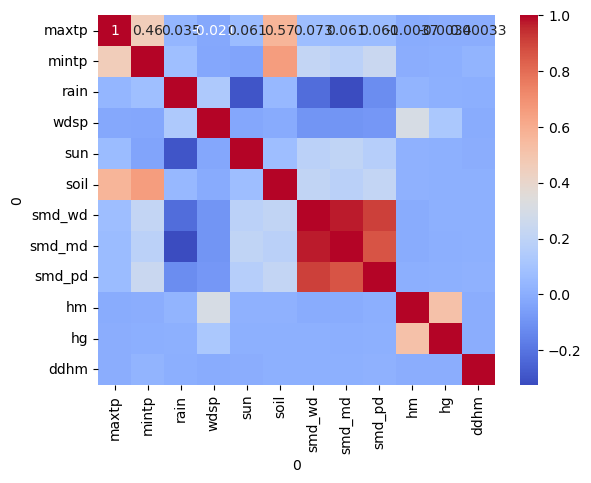

In [129]:
#check correlation
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [130]:
#creating pivot format for Tableau
long_data = df.melt(
    id_vars=['date'],
    value_vars=['maxtp', 'mintp', 'rain'],
    var_name='metric',
    value_name='value'
)

In [131]:
long_data.head()

,date,metric,value
0,1942-01-01,maxtp,5.5
1,1942-01-02,maxtp,5.5
2,1942-01-03,maxtp,5.5
3,1942-01-04,maxtp,5.5
4,1942-01-05,maxtp,3.5


In [132]:
#validate dataset completeness
complete_dates = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
missing_dates = set(complete_dates) - set(df['date'])
print("Missing dates:", missing_dates)

Missing dates: set()


In [134]:
#Converting knots to km/h
df[['wdsp', 'hm', 'hg']] = df[['wdsp', 'hm', 'hg']] * 1.852

In [135]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [136]:
#Binning for better aggregation
bins = [0, 4, 8, 12, 16, 24]
labels = ['Low', 'Moderate', 'High', 'Very High', 'Extremely High']
df['sun_category'] = pd.cut(df['sun'], bins=bins, labels=labels, right=False)

In [138]:
df.describe()

,date,maxtp,mintp,rain,wdsp,hm,ddhm,hg,sun,soil,...,smd_md,smd_pd,year,month,day,temp_range,smd_combined,extreme_rain,heatwave,high_wind
count,30255,3.025500e+04,3.025500e+04,3.025500e+04,3.025500e+04,3.025500e+04,3.025500e+04,3.025500e+04,3.025500e+04,3.025500e+04,...,3.025500e+04,3.025500e+04,30255.000000,30255.000000,30255.000000,30255.000000,30255.000000,30255.0,30255.0,30255.0
mean,1983-06-02 00:00:00,1.290743e-15,1.333956e-16,1.117892e-16,-1.848750e-15,-2.407226e-14,-2.297786e-15,-1.090255e-13,4.603086e-17,-4.358841e-16,...,-1.503049e-16,1.202439e-16,1982.918030,6.512841,15.729698,1.386792,3.843256,0.0,0.0,0.0
min,1942-01-01 00:00:00,-1.620208e+01,-3.217568e+00,-7.027975e-01,-8.021316e+00,-4.743813e+01,-3.989196e+01,-1.104512e+02,-1.333804e+00,-6.379281e+00,...,-2.824441e+00,-1.680362e+00,1942.000000,1.000000,1.000000,0.000000,-2.200000,0.0,0.0,0.0
25%,1962-09-16 12:00:00,1.928145e-01,-4.884706e-01,-7.027975e-01,3.154705e-01,4.910501e-02,2.506771e-02,1.752603e-02,-1.112280e+00,3.643034e-01,...,-2.913689e-03,-1.246074e+00,1962.000000,4.000000,8.000000,0.000000,2.200000,0.0,0.0,0.0
50%,1983-06-02 00:00:00,1.928145e-01,6.559895e-01,-6.004094e-01,3.154705e-01,4.910501e-02,2.506771e-02,1.752603e-02,8.395152e-02,3.643034e-01,...,5.308888e-01,6.358428e-01,1983.000000,7.000000,16.000000,0.000000,5.500000,0.0,0.0,0.0
75%,2004-02-15 12:00:00,1.928145e-01,6.559895e-01,4.234714e-01,3.154705e-01,4.910501e-02,2.506771e-02,1.752603e-02,1.102963e+00,3.643034e-01,...,5.308888e-01,6.358428e-01,2004.000000,10.000000,23.000000,2.500000,5.500000,0.0,0.0,0.0
max,2024-10-31 00:00:00,1.928145e-01,6.559895e-01,2.112875e+00,3.154705e-01,4.910501e-02,2.506771e-02,1.752603e-02,1.102963e+00,3.643034e-01,...,5.308888e-01,6.358428e-01,2024.000000,12.000000,31.000000,8.800000,5.500000,0.0,0.0,0.0
std,NaN,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,23.912125,3.444892,8.800270,2.081158,2.739126,0.0,0.0,0.0


In [142]:
df = df.round(2)


In [139]:
df.rename(columns={
    'maxtp': 'max_temp',
    'mintp': 'min_temp',
    'rain': 'precipitation',
    'gmin': 'min_grass',
    'wdsp': 'wind_speed',
    'hm': 'max_10minute_wind',
    'ddhm': 'dir_10minute_wind',
    'hg': 'max_gust',
    'cbl': 'pressure_cbl',
    'g_rad': 'global_radiation',
    'pe': 'potential_evap',
    'smd_combined': 'total_soil_moisture',
    'ind': 'indicator'
}, inplace=True)

In [143]:
print(df.columns)
print(df.shape)

Index(['date', 'indicator', 'max_temp', 'indicator', 'min_temp', 'igmin',
       'min_grass', 'indicator', 'precipitation', 'pressure_cbl', 'wind_speed',
       'indicator', 'max_10minute_wind', 'indicator', 'dir_10minute_wind',
       'indicator', 'max_gust', 'sun', 'dos', 'global_radiation', 'soil',
       'potential_evap', 'evap', 'smd_wd', 'smd_md', 'smd_pd', 'year', 'month',
       'day', 'temp_range', 'total_soil_moisture', 'wind_category',
       'extreme_rain', 'heatwave', 'high_wind', 'sun_category'],
      dtype='object', name=0)
(30255, 36)


In [144]:
df.to_csv("Mera_CleanData.csv", index=False)